In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from urllib.request import urlretrieve
%matplotlib inline
sns.set()

In [2]:
url = "https://data.seattle.gov/resource/65db-xm6k.csv?$limit=102947"

In [3]:
urlretrieve(url, 'fremont_bike.csv')

('fremont_bike.csv', <http.client.HTTPMessage at 0x2430f93db90>)

In [4]:
%alias head powershell -command "& {Get-Content %s -Head 10}"
%head fremont_bike.csv

"date","fremont_bridge","fremont_bridge_nb","fremont_bridge_sb"
"2024-06-30T23:00:00.000","18","9","9"
"2024-06-30T22:00:00.000","32","10","22"
"2024-06-30T21:00:00.000","52","13","39"
"2024-06-30T20:00:00.000","121","37","84"
"2024-06-30T19:00:00.000","125","57","68"
"2024-06-30T18:00:00.000","147","71","76"
"2024-06-30T17:00:00.000","228","97","131"
"2024-06-30T16:00:00.000","316","113","203"
"2024-06-30T15:00:00.000","273","130","143"


In [5]:
data = pd.read_csv(r'fremont_bike.csv', index_col='date', parse_dates=True)

In [6]:
data.shape

(102947, 3)

In [7]:
#data.drop('fremont_bridge', axis=1, inplace=True)

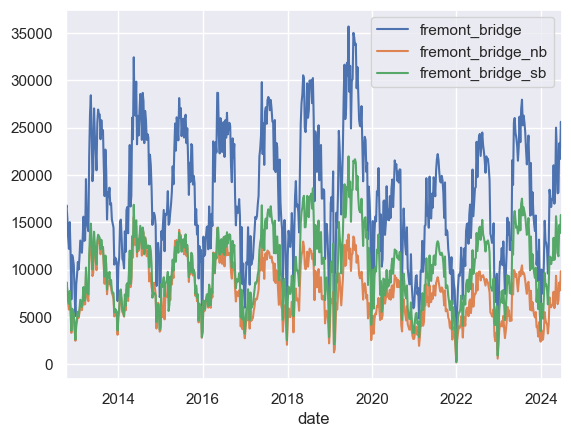

In [8]:
data.resample('w').sum().plot();

<Figure size 1200x800 with 0 Axes>

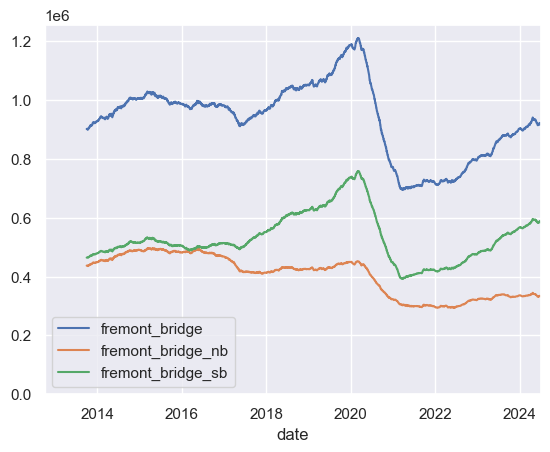

In [9]:
plt.figure(figsize=(12,8));
data.resample('D').sum().rolling(365).sum().plot();
plt.ylim(0, None);

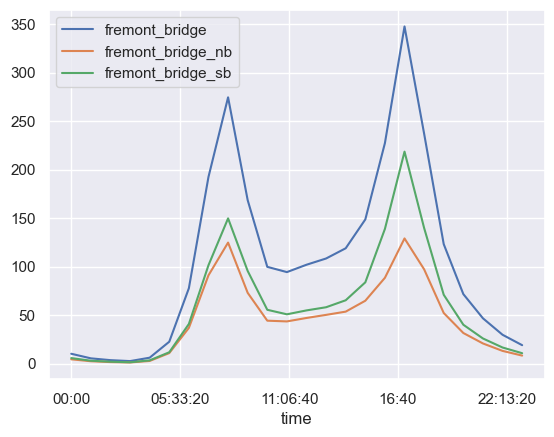

In [10]:
data.groupby(data.index.time).mean().plot();

In [11]:
pivot = data.pivot_table('fremont_bridge', index=data.index.time, columns=data.index.date, dropna=False)

In [12]:
pivot.iloc[:5, :5]

,2012-10-02,2012-10-03,2012-10-04,2012-10-05,2012-10-06
00:00:00,NaN,13.0,18.0,11.0,15.0
01:00:00,NaN,10.0,3.0,8.0,15.0
02:00:00,NaN,2.0,9.0,7.0,9.0
03:00:00,NaN,5.0,3.0,4.0,3.0
04:00:00,NaN,7.0,8.0,9.0,5.0


<Figure size 1600x800 with 0 Axes>

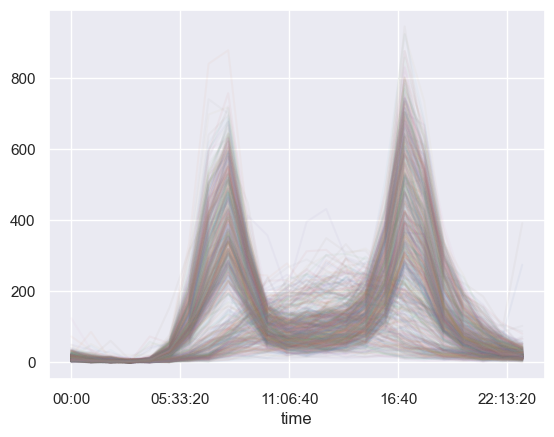

In [13]:
ax=plt.figure(figsize=(16,8));
pivot.iloc[::,100:900].plot(legend=False, alpha=0.05);
